Привет, Евгений!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку.

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2 
    
#### Успех
    
Спасибо тебе за доработку проекта. Вот теперь я его могу принять. Ты отлично постарался и я желаю тебе успехов в дальнешей учебе. Ты точно справишься дальше, я уверен:) 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Спасибо тебе за оформление оглавления к проекту 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
!pip install missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
data = pd.read_csv("/datasets/real_estate_data.csv",sep="\t")

old_data = data.shape[0] 
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Первичная информация о данных получена. 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

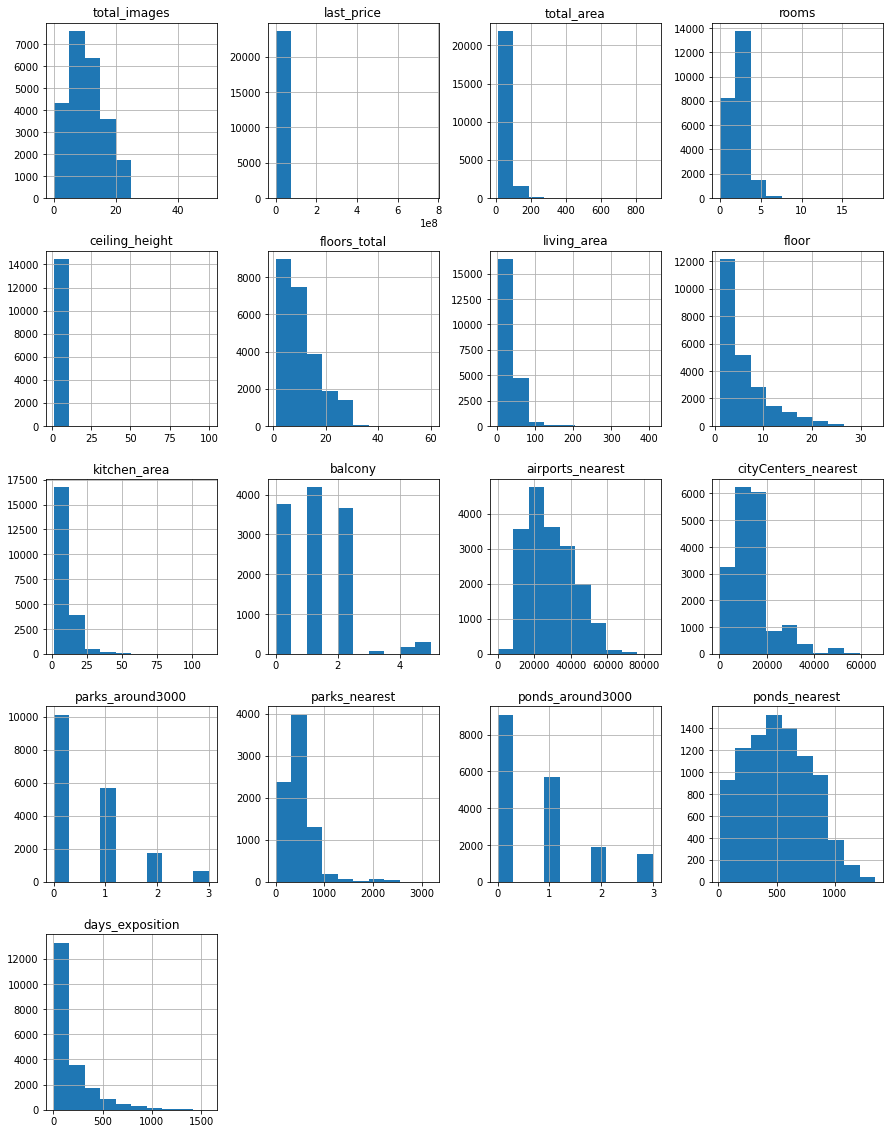

In [5]:
data.hist(figsize=(15, 20))


**<font color="maroon">В некоторых столбцах есть явные выбросы, возможно пользователи что-то перепутали ( потолок 100 метров), но некторые графики даже без обработки выглядят хорошо(ponds around например)</font>**

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Чтобы убрать текстовые предупреждения с графиков, используй plt.show()

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Сюда бы добавить небольшой промежуточный вывод по итогу знакомства с данными. 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Исправлено

### Предобработка данных

In [6]:
for column in data.columns:
    print(column,data[column].isna().sum())

total_images 0
last_price 0
total_area 0
first_day_exposition 0
rooms 0
ceiling_height 9195
floors_total 86
living_area 1903
floor 0
is_apartment 20924
studio 0
open_plan 0
kitchen_area 2278
balcony 11519
locality_name 49
airports_nearest 5542
cityCenters_nearest 5519
parks_around3000 5518
parks_nearest 15620
ponds_around3000 5518
ponds_nearest 14589
days_exposition 3181


<AxesSubplot:>

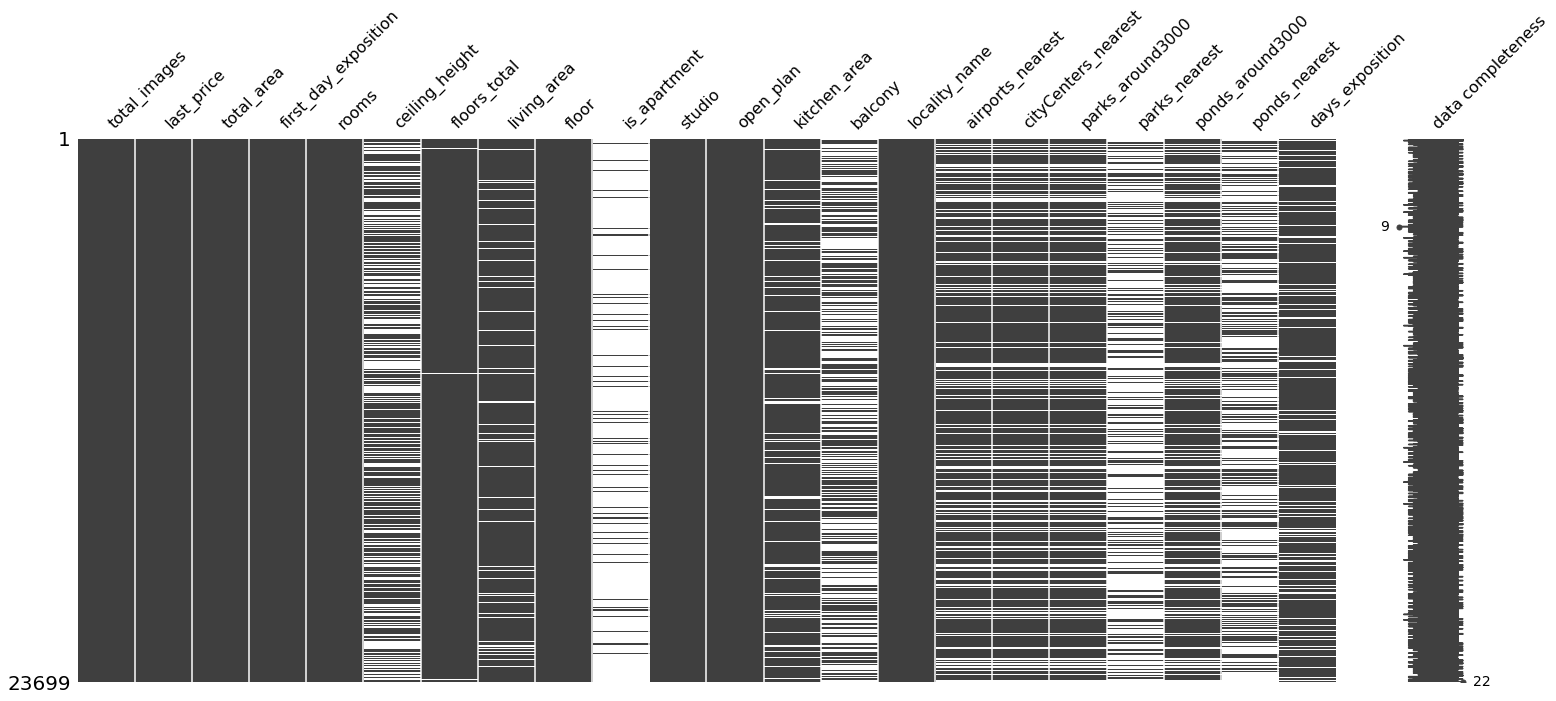

In [7]:
msno.matrix(data, labels=True)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для визуализации пропусков лучше всего использовать такой метод https://russianblogs.com/article/5001266235/

In [8]:
data["is_apartment"].value_counts()


False    2725
True       50
Name: is_apartment, dtype: int64

In [9]:
data["airports_nearest"].max()

84869.0

In [10]:
data['total_area'].corr(data['kitchen_area']) #корреляция есть, но слабая (0.6091211711198318), наверное лучше оставить NaN
#(data["kitchen_area"] / data['total_area']).median() #медианный коэфициент

0.6091211711198318

In [11]:
data['total_area'].corr(data['living_area']) #корреляция есть
(data["living_area"] / data['total_area']).median() #медианный коэфициент

0.5678598992678503

In [12]:
#Если пусто - значит нет
data["balcony"] = data["balcony"].fillna(value=0)
data["ponds_around3000"] = data["ponds_around3000"].fillna(value=0)
data["parks_around3000"] = data["parks_around3000"].fillna(value=0)
#Забыли внести, беру медиану
data["ceiling_height"] = data["ceiling_height"].fillna(value=data["ceiling_height"])
#Если не указано что апартаменты - скорее всего это не апартаменты (False    23649,True        50)
data["is_apartment"] = data["is_apartment"].fillna(value=False)
#Между общей площадью и жилой есть кореляция 0.9, медианный коэфициент 0.5678598992678503
data["living_area"] = data["living_area"].fillna(value=data['total_area']* 0.5678598992678503)

airports_nearest NaN = Скорее всего до аэропорта больше 100 км (Везде населенные пункты это села или поселки, макс = 84км), пока не знаю нужно ли менять на большое число
floors_total = Просто не указали
kitchen_area = Не указали, корреляция с total_area есть, но слабая, наверное лучше оставить NaN
parks_nearest ponds_nearest = парка или водоема рядом нет

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
В целом, по замене пропусков согласен. Значения-заглушки это хорошее решение. 

In [13]:
data.info()
#Нужно поменять first_day_exposition  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [14]:
#2018-10-02T00:00:00
data["first_day_exposition"] = pd.to_datetime(data["first_day_exposition"], format="%Y-%m-%dT%H:%M:%S")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Классный метод тобой использован для приведения даты.

В виде даты, дата полезнее

In [15]:
len(data["locality_name"].unique()) #Количество населенных пунктов с дупликатами

365

In [16]:
data.loc[(data["locality_name"]=="поселок городского типа Рябово") | (data["locality_name"]=="посёлок городского типа Рябово"), "locality_name"] = 'поселок Рябово'
#data.loc[data["locality_name"] == 'городской посёлок Янино-1' ,"locality_name"] = 'городской поселок Янино-1'
data.loc[(data["locality_name"]=='посёлок Мурино') | (data["locality_name"]=='поселок Мурино'), "locality_name"] = 'Мурино'
data.loc[data["locality_name"] == 'городской посёлок Фёдоровское' ,"locality_name"] = 'деревня Фёдоровское'
data.loc[data["locality_name"] == 'деревня Кудрово' ,"locality_name"] = 'Кудрово'
data.loc[data["locality_name"] == 'поселок при железнодорожной станции Вещево' ,"locality_name"] = 'поселок станции Вещево'
data.loc[data["locality_name"] == 'поселок при железнодорожной станции Приветнинское' ,"locality_name"] = 'поселок станции Приветнинское'
data.loc[data["locality_name"] == 'поселок Любань' ,"locality_name"] = 'Любань'
data.loc[data["locality_name"] == 'поселок Гарболово' ,"locality_name"] = 'деревня Гарболово'
#data.loc[data["locality_name"] == 'городской поселок Рощино' ,"locality_name"] = 'поселок городского типа Рощино'
#data.loc[data["locality_name"] == 'городской поселок Павлово' ,"locality_name"] = 'поселок городского типа Павлово'
#data.loc[data["locality_name"] == 'городской поселок Советский' ,"locality_name"] = 'поселок городского типа Советский'
#data.loc[data["locality_name"] == 'городской поселок Большая Ижора' ,"locality_name"] = 'поселок городского типа Большая Ижора'

In [17]:
for name in data["locality_name"]:
    if isinstance(name,str):
        if "ё" in name:
            data.loc[data["locality_name"] == name ,"locality_name"] = name.replace("ё","е")
        

In [18]:
for name in data["locality_name"]:
    if isinstance(name,str):
        if "городской поселок" in name:
            data.loc[data["locality_name"] == name ,"locality_name"] = name.replace("городской поселок","поселок городского типа")

In [19]:
for name in data["locality_name"].unique():
    if isinstance(name,str):
        name = name.split()
        dupls = []
        for name1 in data["locality_name"].unique():
            if isinstance(name1,str):
                if name[-1] in name1:
                    dupls.append(name1)
        if len(dupls) > 1:
            print(dupls)
    
#Никольское и село Никольское разные места
#село Павлово поселок городского типа Павлово разные
#['Коммунар', 'поселок Коммунары'] Разные
#['поселок Зимитицы', 'деревня Зимитицы'] Разные (но оч близко)
#['поселок станции Громово', 'поселок Громово'] Разные
#['деревня Калитино', 'поселок Калитино'] Разные (но оч близко)
#['поселок Щеглово', 'деревня Щеглово'] Разные
#['поселок Лесное', 'коттеджный поселок Лесное'] Разное

['Коммунар', 'поселок Коммунары']
['поселок городского типа Красный Бор', 'Сосновый Бор', 'деревня Чудской Бор', 'деревня Бор', 'деревня Трубников Бор', 'поселок Пансионат Зеленый Бор', 'деревня Борисова Грива']
['садовое товарищество Новая Ропша', 'поселок Ропша']
['Кингисепп', 'поселок Кингисеппский']
['деревня Старая', 'поселок Старая Малукса', 'село Старая Ладога', 'деревня Старая Пустошь']
['поселок Новый Свет', 'Светогорск']
['Никольское', 'село Никольское']
['поселок городского типа Красный Бор', 'Сосновый Бор', 'деревня Чудской Бор', 'деревня Бор', 'деревня Трубников Бор', 'поселок Пансионат Зеленый Бор', 'деревня Борисова Грива']
['поселок Романовка', 'деревня Малая Романовка']
['Луга', 'поселок Усть-Луга']
['село Павлово', 'поселок городского типа Павлово']
['поселок городского типа Большая Ижора', 'поселок Усть-Ижора']
['село Павлово', 'поселок городского типа Павлово']
['поселок городского типа Рахья', 'садовое товарищество Рахья']
['деревня Большие Колпаны', 'деревня Малые

In [20]:
len(data["locality_name"].unique()) # Количетво населенных пунктов без дубликатов 
#365-308 = 57 неявных дубликатов

318

 **<font color="maroon">убрали 57 неявных дубликатов</font>**

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Надо бы здесь показать от какого количества неявных дублей нам удалось избавиться

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
И тут хорошо

<AxesSubplot:>

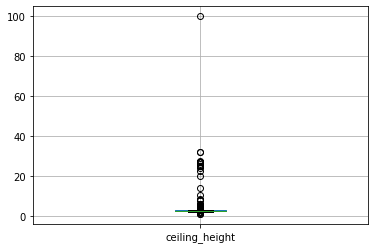

In [21]:
data.boxplot("ceiling_height")



**<font color="maroon">Потолок выше 20 метров - нереально, но то, что пользователь просто хотел написать, например, 2,5 метра, но забыл точку очень похоже на правду</font>**

<AxesSubplot:>

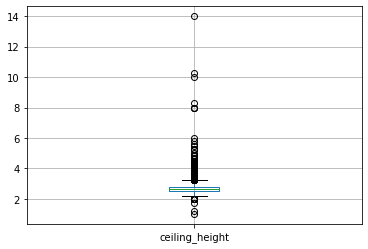

In [22]:
data.loc[data["ceiling_height"] >= 20,"ceiling_height"] = data.loc[data["ceiling_height"] >= 20,"ceiling_height"] / 10
data.boxplot("ceiling_height")

**<font color="maroon">Потолок ниже 2 метров нереалистично, но непонятно почему так написали, поэтому удалим. выше 3.2 метра тоже уже редкие значения</font>**

<AxesSubplot:>

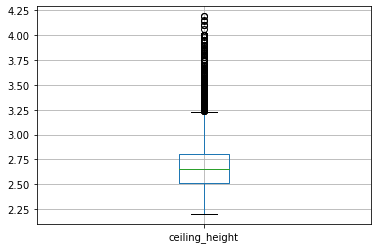

In [23]:
data = data.loc[~(data["ceiling_height"] >= 4.2),:]
data = data.loc[~(data["ceiling_height"] <= 2),:]
data.boxplot("ceiling_height")

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
В целом, согласен с действиями и здесь, но только не забывай добавлять выводы и пояснения. Надо добавить описание того, почему ты решаешь делать именно так. 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Здорово

<AxesSubplot:>

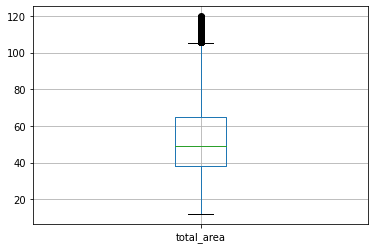

In [24]:

data.loc[data["total_area"] >= 120,"total_area"] = data.loc[data["total_area"] >= 120,"total_area"] / 10
#data = data.loc[~(data["total_area"] >= 110),:]

data.boxplot("total_area")


<AxesSubplot:>

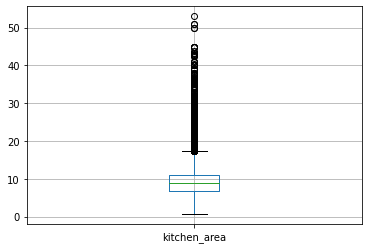

In [25]:
data.loc[(data["kitchen_area"] >= data["total_area"] //2),"kitchen_area"] = data.loc[(data["kitchen_area"] >= data["total_area"] //2),"kitchen_area"] / 10
#data = data.loc[~(data["kitchen_area"] >= 18),:]

data.boxplot("kitchen_area")


<AxesSubplot:>

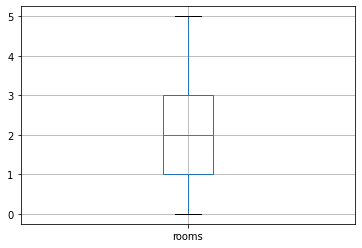

In [26]:
data = data.loc[~(data["rooms"] >= 6),:]
data.boxplot("rooms")

<AxesSubplot:>

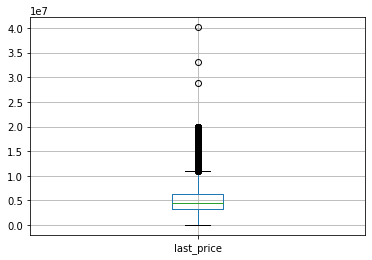

In [27]:
data.loc[data["last_price"] >= 20000000,"last_price"] = data.loc[data["last_price"] >= 20000000,"last_price"] / 10
#data = data.loc[~(data["last_price"] >= 12000000),:]
data.boxplot("last_price")
#data.sort_values("last_price")

<AxesSubplot:>

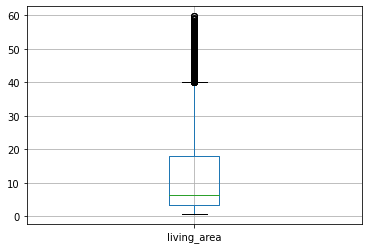

In [28]:
data.loc[(data["living_area"] >= data["total_area"] * 0.5678598992678503),"living_area"] = data.loc[(data["living_area"] >= data["total_area"] *0.5678598992678503),"living_area"] / 10
data = data.loc[~(data["living_area"] >= 60),:]
data = data.loc[~(data["living_area"] == 0),:]
data.boxplot("living_area")

<AxesSubplot:>

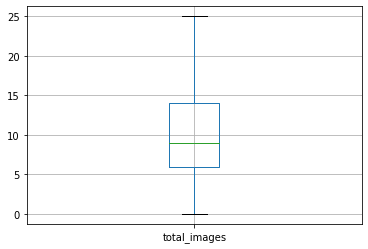

In [29]:
data = data.loc[~(data["total_images"] >= 26),:]
data.boxplot("total_images")

<AxesSubplot:>

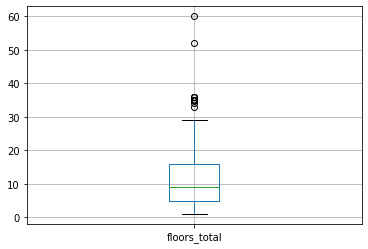

In [30]:
#data = data.loc[~(data["floors_total"] >= 30),:]
data.boxplot("floors_total")
#data[data["floors_total"] >= 30]

<AxesSubplot:>

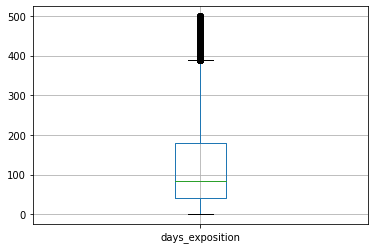

In [31]:
data = data.loc[~(data["days_exposition"] >= 500),:]
data.boxplot("days_exposition")

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Вот согласен со всем, но только надо посчитать сколько данных у нас осталось после ограничения выбросов. Основаня цель оставить для анализа не менее 90% данных от первоначальных, иначе результат исследования может исказиться. 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Так лучше. Мы убедились, что данных у нас осталось достаточно

Автоматические данные сильно надежнее, много нереалистично больших цен, площадей и прочего. Возможно это тоже стоит автоматизировать или сделать более понятные инструкции при создании объявления

In [32]:
#23699 строк изначально
#17420 / 23699 = 0.7350521119034559   упс, щедро поудалял

data.shape[0] / old_data # теперь нормально

0.9134140681041394

**<font color="maroon">91% данных остался.</font>**

### Посчитайте и добавьте в таблицу новые столбцы

<AxesSubplot:>

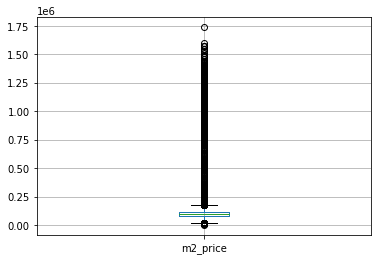

In [33]:
data["m2_price"] = data["last_price"] / data["total_area"]
#data.hist("m2_price",bins=100)
data[data["m2_price"] >= 1000000]
data.boxplot("m2_price")

In [34]:
data["week_day"] = data["first_day_exposition"].dt.weekday
data["month"] = data["first_day_exposition"].dt.month
data["year"] = data["first_day_exposition"].dt.year
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,week_day,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
3,0,6490000.0,15.9,2015-07-24,3,NaN,14.0,9.028972,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.400000,5,False,...,NaN,0.0,NaN,0.0,NaN,55.0,95065.789474,0,9,2018


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Отлично здесь 

In [35]:
data.loc[data["floor"] == 1, "floor_type"] = "первый"
data.loc[(data["floor"] > 1) & (data["floor"] < data["floors_total"]) , "floor_type"] = "другой"
data.loc[data["floor"] == data["floors_total"], "floor_type"] = "последний"
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,week_day,month,year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
3,0,6490000.0,15.9,2015-07-24,3,NaN,14.0,9.028972,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.400000,5,False,...,0.0,NaN,0.0,NaN,55.0,95065.789474,0,9,2018,другой


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Достаточно хороший способ категоризации. 

In [36]:
data["cityCenters_nearest_km"] = data["cityCenters_nearest"] / 1000
data["cityCenters_nearest_km"] = data["cityCenters_nearest_km"].round(0)
data["cityCenters_nearest_km"]

0        16.0
1        19.0
3         7.0
4         8.0
5         NaN
         ... 
23693    34.0
23694     4.0
23695     NaN
23696     NaN
23698     NaN
Name: cityCenters_nearest_km, Length: 21647, dtype: float64

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А теперь данные готовы к дальнейшему исследованию. 

### Проведите исследовательский анализ данных

<AxesSubplot:>

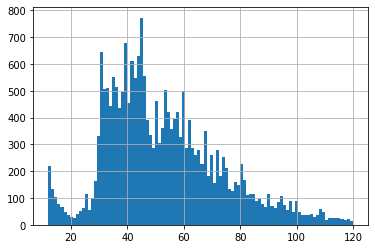

In [37]:
data["total_area"].hist(bins=100)
#data[data["studio"] == True]

Очень много квартир 30 - 60 м2, выглядит правдоподобно. Квартиры < 30 - Студии

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Все так. Большая част ьквартир находится в рамках этого распределения 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,week_day,month,year,floor_type,cityCenters_nearest_km
7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,4.065877,22,False,...,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,4.360000,7,False,...,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,15.0
11,9,3300000.0,44.0,2018-08-27,2,NaN,5.0,3.100000,4,False,...,NaN,0.0,NaN,7.0,75000.000000,0,8,2018,другой,52.0
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,2.700000,5,False,...,294.0,3.0,298.0,366.0,82943.925234,5,7,2017,последний,33.0
18,8,3250000.0,31.0,2017-01-27,1,2.50,5.0,1.940000,2,False,...,759.0,0.0,NaN,168.0,104838.709677,4,1,2017,другой,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,8,3300000.0,31.0,2017-04-29,1,2.55,9.0,1.800000,6,False,...,140.0,1.0,317.0,193.0,106451.612903,5,4,2017,другой,12.0
23690,3,5500000.0,52.0,2018-07-19,2,NaN,5.0,3.100000,2,False,...,300.0,0.0,NaN,15.0,105769.230769,3,7,2018,другой,6.0
23692,2,1350000.0,30.0,2017-07-07,1,NaN,5.0,1.750000,4,False,...,NaN,0.0,NaN,413.0,45000.000000,4,7,2017,другой,NaN
23693,9,4600000.0,62.4,2016-08-05,3,2.60,9.0,4.000000,8,False,...,352.0,1.0,675.0,239.0,73717.948718,4,8,2016,другой,34.0


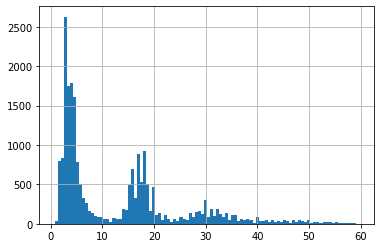

In [38]:
data["living_area"].hist(bins=100)
data[data["living_area"] < 5]

Я не уверен что тут делать. Жилая площадь это не вся квартира и может быть наверное одной комнатой

<AxesSubplot:>

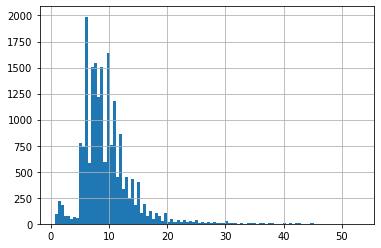

In [39]:
data["kitchen_area"].hist(bins=100)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Кухни у нас достаточно небольшие получаются. 

Пики можно объяснить тем, что люди просто округляют площадь

<AxesSubplot:>

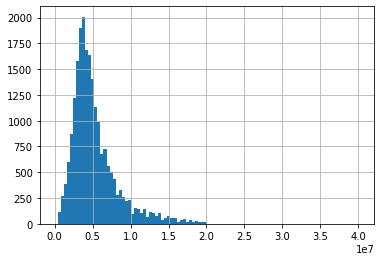

In [40]:
data["last_price"].hist(bins=100)

Хорошее распределение. Скачки - люди просто округляют цену. 

<AxesSubplot:>

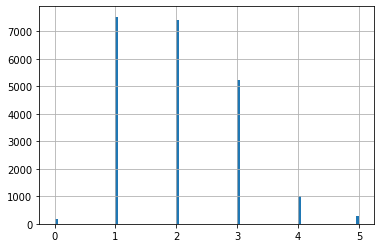

In [41]:
data["rooms"].hist(bins=100)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Распределение по комнатам примерно соотносится с распределением по площади. 

В основном продают квартиры с 1 и 2 комнатами

<AxesSubplot:>

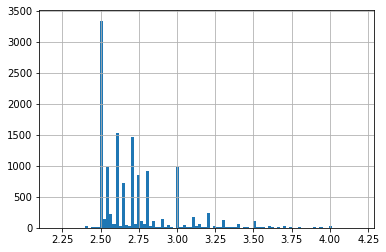

In [42]:
data["ceiling_height"].hist(bins=100)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Потолки высотой более 3 метров могут говорить о наличии квартир дореволюционной застройки. 

2,5 метра - самая частая высота, головой уже не удариться.

<AxesSubplot:>

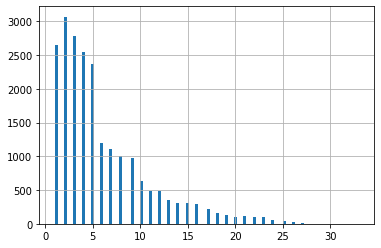

In [43]:
data["floor"].hist(bins=100)

Правильное распределение Пуассона, 1-5 этаж продают чаще всего тк пятиэтажек много

<AxesSubplot:>

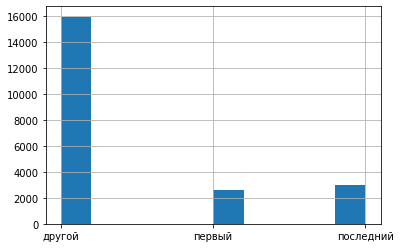

In [44]:
data["floor_type"].hist()

Других этажей больше, первых и последних примерно одинаково, выглядит норм.

<AxesSubplot:>

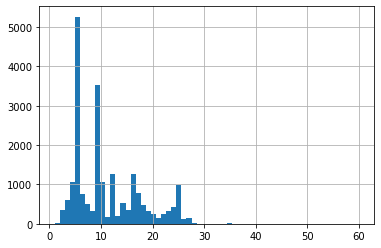

In [45]:
data["floors_total"].hist(bins=60)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Тут мы видим, что у нас много вартир типовой застройки

Пяти и девяти этажек действительно много

<AxesSubplot:>

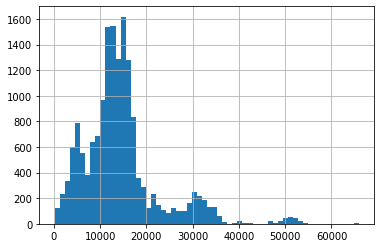

In [46]:
data["cityCenters_nearest"].hist(bins=60)
#data.loc[(data["cityCenters_nearest"] >= 30000) & (data["cityCenters_nearest"] <= 40000), "locality_name"]

Большинство квартир продают в 10 - 20 км от центра, в 50 км находится Ломоносов в 30 км тоже крупные населенные пункты

<AxesSubplot:>

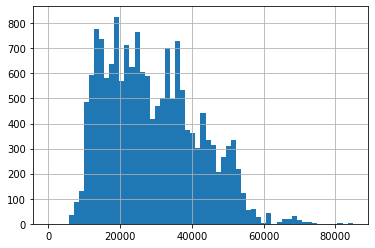

In [47]:
data["airports_nearest"].hist(bins=60)

Большинство квартир продают в 10 - 40 км от аэропорта

<AxesSubplot:>

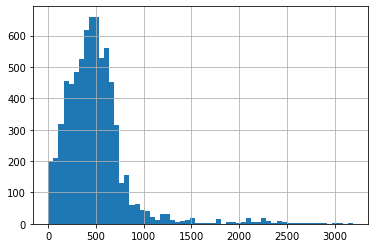

In [48]:
data["parks_nearest"].hist(bins=60)

Большинство квартир продают в 500 метрах от парка

<AxesSubplot:>

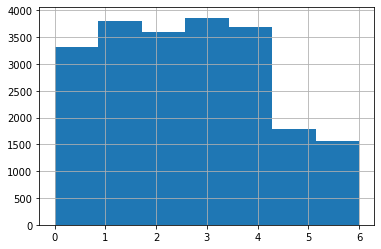

In [57]:
#data["first_day_exposition"].dt.strftime('%d%m').hist(bins=10,figsize=(15,5))
data["week_day"].hist(bins=7)

**<font color="maroon">На выходных квартир продается сильно меньше, больше всего продают в четверг</font>**

<AxesSubplot:>

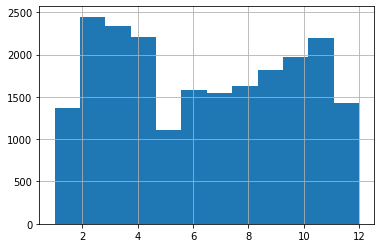

In [60]:
data["month"].hist(bins=12)

**<font color="maroon">В мае, декабре и январе сильные провалы, больше всего продаж в феврале </font>**

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

Тут надо по дням и месяцам график построить. Ты же для этого специально выделял столбцы

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Тут вот хорошо уже. Видишь, в выходные дни у нас меньше всего публикуют объявлений. 

А как читать? # К старому графику

Как то непонятно все равно. Могу сделать два графика - один для дней, другой для месяцев

count    18548.000000
mean       126.636457
std        118.865919
min          1.000000
25%         41.000000
50%         84.000000
75%        180.000000
max        499.000000
Name: days_exposition, dtype: float64

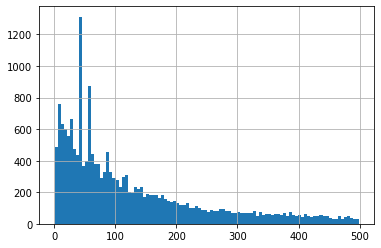

In [61]:
data["days_exposition"].hist(bins=100)

data["days_exposition"].describe()

**<font color="maroon">Обычно продажа занимает до 84 дней. Необычно долгие продажи - после 180 дней, необчно быстрые - 41 день
Пики на 45 и 60 днях. - 1,5 и 2 месяца. Довольно круглые числа, наверно люди соглашаются на предложения или просто забывают продлить объявление</font>**

In [64]:
data.groupby("days_exposition")["first_day_exposition"].count().sort_values(ascending=False)

days_exposition
45.0     879
60.0     536
7.0      233
30.0     205
90.0     192
        ... 
496.0      4
2.0        3
474.0      3
373.0      3
1.0        1
Name: first_day_exposition, Length: 499, dtype: int64

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

Так, хорошо, а почему не высказался о причинх возможного возникновения выбросов. Тут же они явно выделяются  

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Все так. В эти дни система убирает с показа бесплатные объявления 

<AxesSubplot:xlabel='year', ylabel='last_price'>

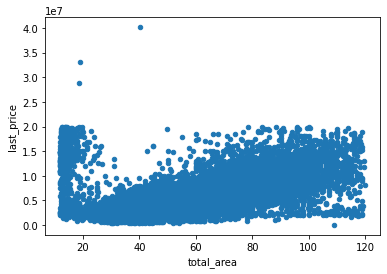

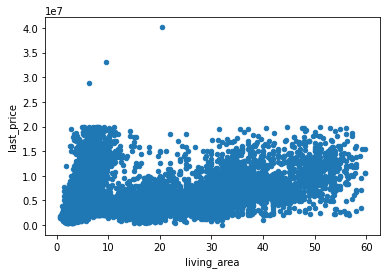

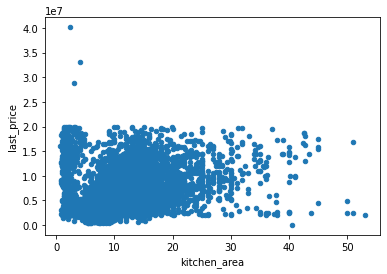

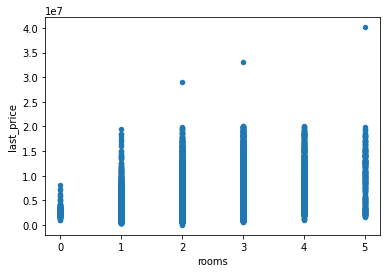

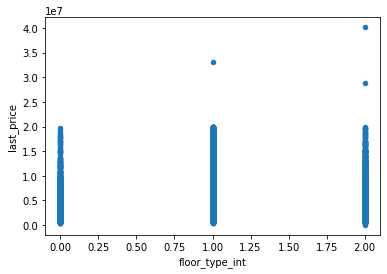

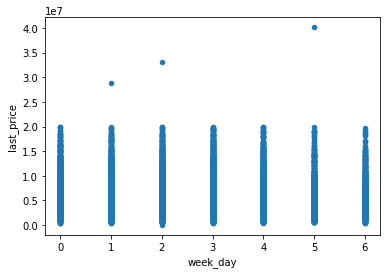

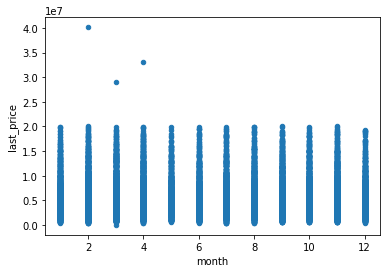

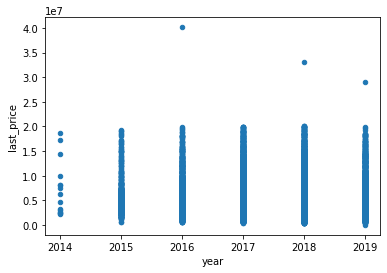

In [51]:
data.plot(x='total_area', y='last_price', kind='scatter') 
data.plot(x='living_area', y='last_price', kind='scatter') 
data.plot(x='kitchen_area', y='last_price', kind='scatter') 
data.plot(x='rooms', y='last_price', kind='scatter') 


data["floor_type_int"] = data["floor_type"].replace({"первый":0,"другой":1,"последний":2})
data.plot(x='floor_type_int', y='last_price', kind='scatter') 
data.plot(x='week_day', y='last_price', kind='scatter') 
data.plot(x='month', y='last_price', kind='scatter') 
data.plot(x='year', y='last_price', kind='scatter') 

- Цена на рынке зависит от
    1. Размера квартиры
    2. Расстояния до центра города
- Количество объявлений на платформе с 2014 года сильно выросло 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

В целом, тут хорошо вышло. Не хватает выводов только 

In [52]:
top10_locations = data.groupby("locality_name")["last_price"].count().sort_values(ascending=False).head(10)
top10_locations
avg_m2_price = data.query("locality_name in @top10_locations.index").groupby("locality_name")["m2_price"].mean().sort_values()
avg_m2_price
#Самый дорогой - Санкт-Петербург самый дешевый - Выборг    


locality_name
Выборг                66818.383655
Всеволожск            72021.909903
Гатчина               73842.014868
Колпино               77098.892453
поселок Шушары        80442.387181
Мурино                86332.225122
поселок Парголово     90077.945322
Кудрово               95399.101107
Пушкин               129564.838995
Санкт-Петербург      133269.739176
Name: m2_price, dtype: float64

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Рейтинг по городам получен. Супер. 

<AxesSubplot:xlabel='cityCenters_nearest_km'>

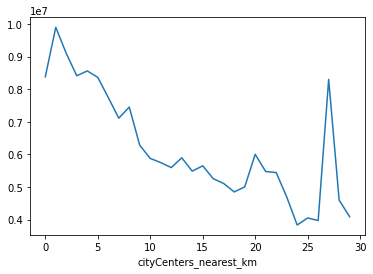

In [68]:
km_price = data[data["locality_name"]=="Санкт-Петербург"].groupby("cityCenters_nearest_km")["last_price"].mean()
km_price.plot()


In [71]:
data[(data["cityCenters_nearest_km"]==27) & (data["locality_name"]=="Санкт-Петербург")]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m2_price,week_day,month,year,floor_type,cityCenters_nearest_km,floor_type_int
748,13,14350000.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,0.0,NaN,128.0,193918.918919,1,11,2017,другой,27.0,1.0
5961,6,2250000.0,32.0,2018-02-27,1,NaN,2.0,16.5,2,False,...,0.0,NaN,178.0,70312.500000,1,2,2018,последний,27.0,2.0






<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

Давай тут график выведем. Так результат будет лучше восприниматься.  

**<font color="maroon">Чем ближе к центру тем дороже, за некторыми редкими исключениями. Выброс на 27 км Скорее всего дорогой район, еще в интернете увидел, что там дворец стоит, может его продают?</font>**

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Да, там есть выброс, который просто икажает представление из-аз своей высокой цены. 

### Общий вывод

- Цена на рынке зависит от
    1. Размера квартиры
    2. Расстояния до центра города
    3. Населенного пункта (Санкт-Петербург - самый дорогой)
- Количество объявлений на платформе с 2014 года сильно выросло 
- Обычно продажа квартиры занимает до 84 дней 
- В основном продают квартиры с 1 и 2 комнатами, 2,5 метра - самая частая высота потолка 
- 5 и 9 этажных зданий сильно больше чем домов других этажностей. 
**<font color="maroon">-Рекомендация: Добавить или изменить инструкцию при размещении объявления - очень много неадекватных площадей и цен, скорее всего люди путаются в точках. Если это можно атоматизировать (Мб с помощью кадастра) будет очень хорошо.
-Итог: На цену влияет в основном расположение и размер, расположение даже сильнее. Остальные факторы не (этаж, площадь кухни и высота потолка и тд) незначительно влияют на стоимость.</font>**

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

Вот за итоговый вывод похвалить не могу. Ты с одной стороны достаточно лаконично пишешь, но вывод без рекомендаций и резюмирующего итога неполноценен. Давай доработаем. 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Вот а теперь другое дело. 

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Благодарю тебя за выполнение проекта. Мне очень понравилось, как ты разобрался с предобработкой данных. Твои проект лаконичен и все на своих местах. Ты подбираешь правильные методы для анализа и строишь хорошие графики. Однако, в проекте есть несколько замечаний, которые надо исправить:

* Описать сколько данных у нас осталось после удаления выбросов и неявных дублей. 
* Добавить промежуточные выводы. 
* Пояснить выбросы на одном из графиков.
* Построить график по дням и месяцам публикации. 
* Дорабртать итоговый вывод.
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод